In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [7]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [8]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.drop('Cabin',axis = 1,inplace=True)

In [10]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [11]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [12]:
df['Embarked'] = df['Embarked'].map({'C':0,'Q':1,'S':2})

In [13]:
df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,29.599282,0.447368,0.392344,35.576535,1.401914
std,120.810458,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.854496
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,2.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [14]:
df2 = pd.read_csv('Survived.csv')

In [15]:
newdf = pd.merge(df,df2,on = 'PassengerId')

In [16]:
newdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2,1


Univariate Analysis

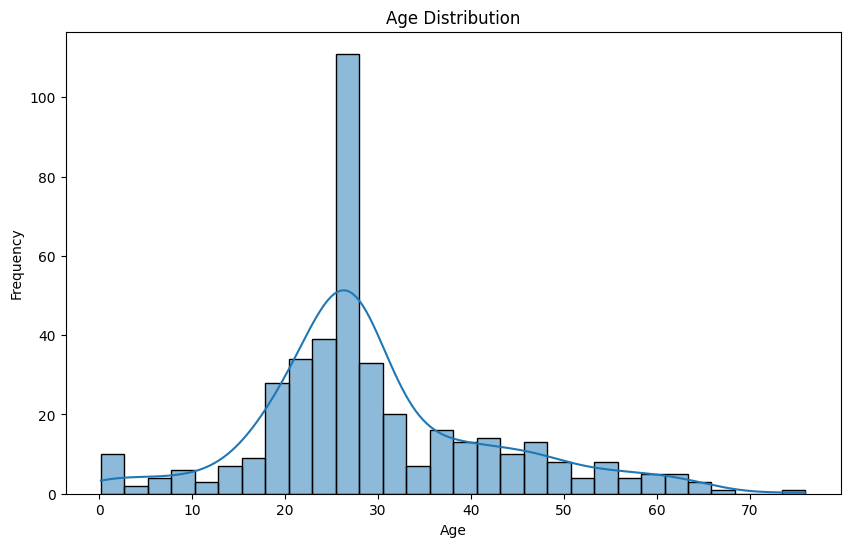

In [17]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(newdf['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Bivariate Analysis

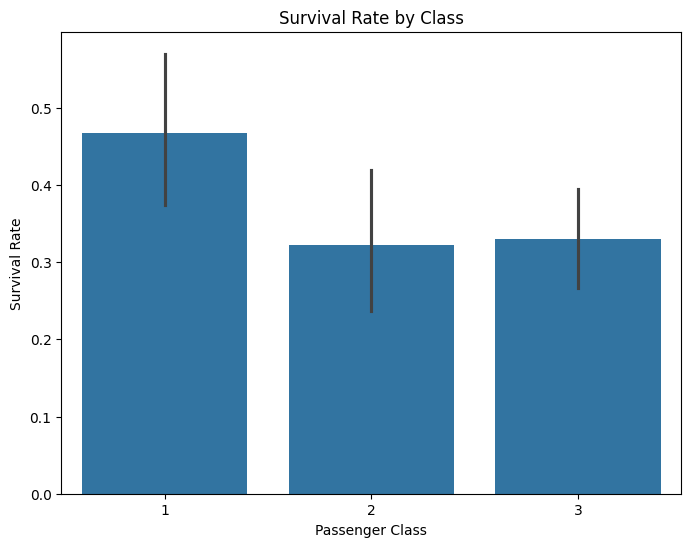

In [18]:
# Survival rate by class
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=newdf)
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

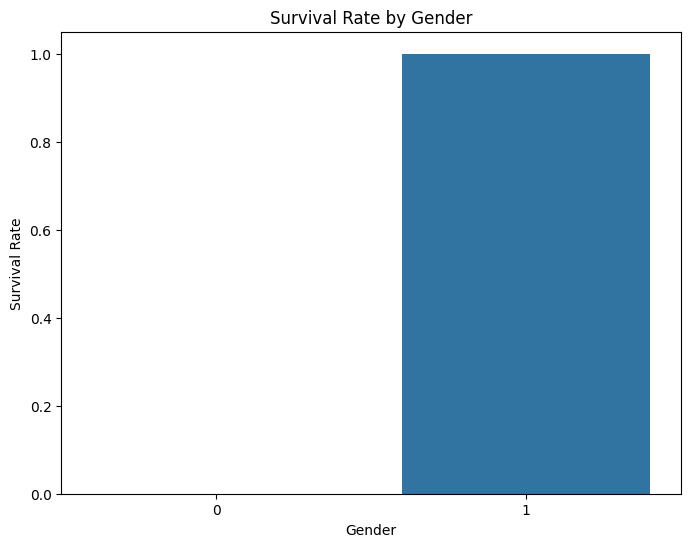

In [19]:
#Survival Rate by Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=newdf)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()


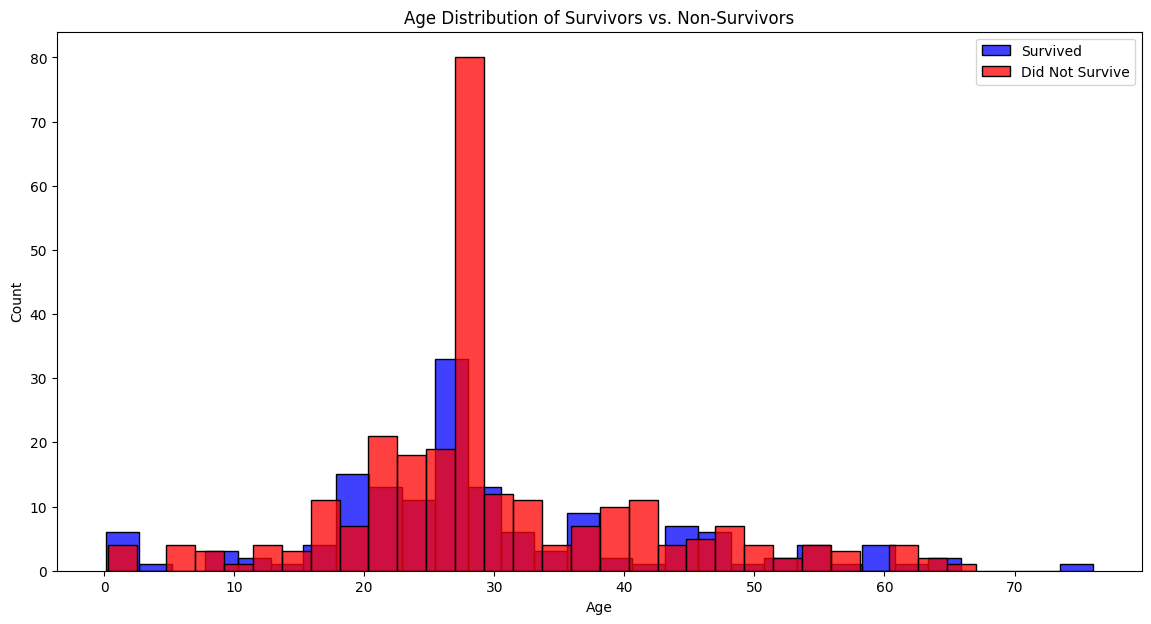

In [20]:
plt.figure(figsize=(14,7))
sns.histplot(newdf[newdf['Survived'] == 1]['Age'], bins=30, kde=False, color='blue', label='Survived')
sns.histplot(newdf[newdf['Survived'] == 0]['Age'], bins=30, kde=False, color='red', label='Did Not Survive')
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [21]:
numeric_df = newdf.select_dtypes(include=['number'])

In [22]:
corr_matrix = numeric_df.corr()

Multivariate Analysis

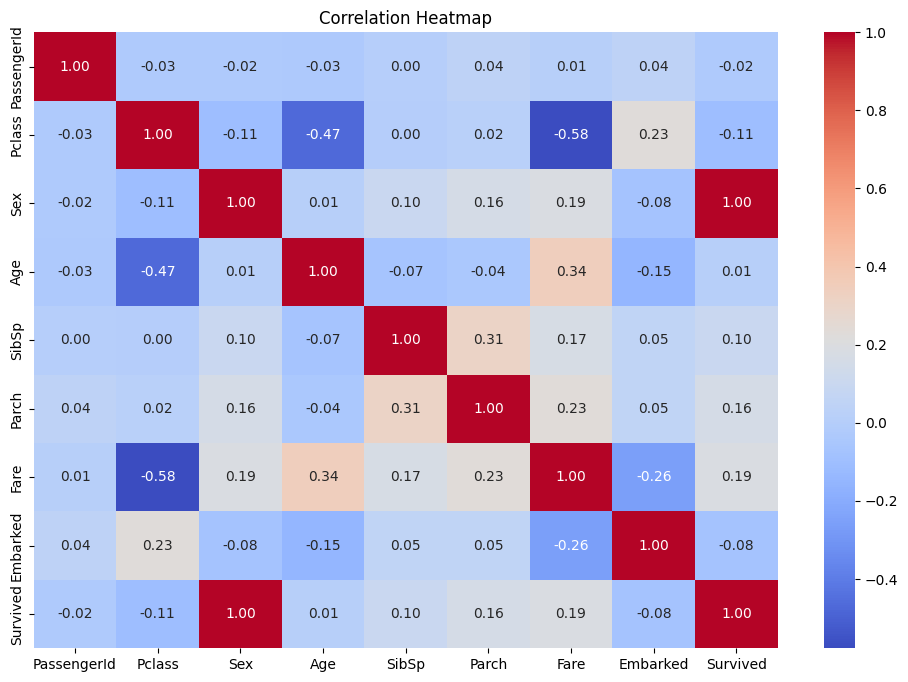

In [23]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Summary of Insights from the Titanic Dataset

### Data Cleaning
- Missing values in the 'Age' and 'Fare' columns were filled with the median values.
- Missing values in the 'Embarked' column were filled with the mode.

### Exploratory Data Analysis (EDA)

#### Univariate Analysis
- The age distribution shows a right-skewed distribution with a higher frequency of younger passengers.

#### Bivariate Analysis
- **Survival Rate by Class:** Passengers in higher classes (1st class) had a higher survival rate compared to those in lower classes (3rd class).
- **Age Distribution by Survival Status:** 
  - Survivors tend to be younger compared to non-survivors.
  - There is a noticeable difference in the age distribution between survivors and non-survivors.

#### Multivariate Analysis
- **Correlation Heatmap:** 
  - 'Fare' and 'Pclass' have a moderate negative correlation, indicating that higher class tickets generally cost more.
  - 'Survived' has a moderate positive correlation with 'Fare' and a moderate negative correlation with 'Pclass', suggesting that passengers who paid higher fares and were in higher classes had higher survival rates.

### Key Findings
- Passenger class and fare paid are significant indicators of survival.
- Younger passengers had a higher likelihood of survival.
- There are important correlations between passenger demographics, class, and survival outcomes that can be further explored for predictive modeling.
